<!--NAVIGATION-->

<a href="https://colab.research.google.com/github/bpesquet/machine-learning-katas/blob/master/notebooks/demos/tools/PyTorch.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>


# Demo: PyTorch In Action

## Package setup

In [19]:
# The mlkatas package contains various utility functions required by all katas
!pip install mlkatas

In [20]:
# Import base packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import mlkatas

In [21]:
# Setup plots
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8
%config InlineBackend.figure_format = 'retina'
sns.set()

In [67]:
# Import ML packages
from sklearn.datasets import make_moons
import torch
import torch.nn as nn
from torch.utils.tensorboard import SummaryWriter

%load_ext tensorboard

print(f'PyTorch version: {torch.__version__}')

PyTorch version: 1.3.0


## PyTorch Tensors

In [2]:
x = torch.tensor([5.5, 3])
print(x)
print(x.size())

tensor([5.5000, 3.0000])
torch.Size([2])


In [3]:
x = torch.rand(5, 3)
print(x)
print(x.size())

tensor([[0.2007, 0.3763, 0.3643],
        [0.6642, 0.5372, 0.6118],
        [0.0518, 0.8802, 0.8449],
        [0.2775, 0.4892, 0.4623],
        [0.7114, 0.4133, 0.9628]])
torch.Size([5, 3])


In [4]:
y = x + 2
print(y)

tensor([[2.2007, 2.3763, 2.3643],
        [2.6642, 2.5372, 2.6118],
        [2.0518, 2.8802, 2.8449],
        [2.2775, 2.4892, 2.4623],
        [2.7114, 2.4133, 2.9628]])


### Indexing

In [5]:
print(x[:, 1])

tensor([0.3763, 0.5372, 0.8802, 0.4892, 0.4133])


### Reshaping à la NumPy

In [6]:
x.reshape(3, 5)

tensor([[0.2007, 0.3763, 0.3643, 0.6642, 0.5372],
        [0.6118, 0.0518, 0.8802, 0.8449, 0.2775],
        [0.4892, 0.4623, 0.7114, 0.4133, 0.9628]])

### Reshaping with _view()_

In [7]:
x.view(15)

tensor([0.2007, 0.3763, 0.3643, 0.6642, 0.5372, 0.6118, 0.0518, 0.8802, 0.8449,
        0.2775, 0.4892, 0.4623, 0.7114, 0.4133, 0.9628])

In [8]:
# The dimension identified by -1 is inferred from other dimensions
print(x.view(-1, 5)) # Shape: (3,5)
print(x.view(5, -1)) # Shape: (5, 3)
print(x.view(-1,))   # Shape: (15,)

# Error: a tensor of size 15 can't be reshaped into a (?, 4) tensor
# print(x.view(-1, 4))

tensor([[0.2007, 0.3763, 0.3643, 0.6642, 0.5372],
        [0.6118, 0.0518, 0.8802, 0.8449, 0.2775],
        [0.4892, 0.4623, 0.7114, 0.4133, 0.9628]])
tensor([[0.2007, 0.3763, 0.3643],
        [0.6642, 0.5372, 0.6118],
        [0.0518, 0.8802, 0.8449],
        [0.2775, 0.4892, 0.4623],
        [0.7114, 0.4133, 0.9628]])
tensor([0.2007, 0.3763, 0.3643, 0.6642, 0.5372, 0.6118, 0.0518, 0.8802, 0.8449,
        0.2775, 0.4892, 0.4623, 0.7114, 0.4133, 0.9628])


### From NumPy to PyTorch

In [9]:
a = np.random.rand(2,2)
b = torch.from_numpy(a)
print(b)
# a and b share memory
a *= 2
print(b)
b += 1
print(a)

tensor([[0.1694, 0.5117],
        [0.8796, 0.9606]], dtype=torch.float64)
tensor([[0.3387, 1.0234],
        [1.7593, 1.9212]], dtype=torch.float64)
[[1.33871491 2.02341208]
 [2.75925426 2.92115302]]


### From PyTorch to NumPy

In [10]:
a = torch.rand(2,2)
b = a.numpy()
print(b)
# a and b share memory
a *= 2
print(b)
b += 1
print(a)

[[0.7923381  0.30181867]
 [0.841456   0.10941333]]
[[1.5846761  0.60363734]
 [1.682912   0.21882665]]
tensor([[2.5847, 1.6036],
        [2.6829, 1.2188]])


### GPU-based tensors

In [11]:
# Look for an available CUDA device
if torch.cuda.is_available():
    device = torch.device("cuda")
    # Move an existing tensor to GPU
    x = x.to(device)
    print(x)
    # Directly create a tensor on GPU
    t = torch.ones(3, 3, device=device)
    print(t)
else:
    print('No CUDA device available :(')

No CUDA device available :(


You can read (much) more about PyTorch tensors here: <https://pytorch.org/docs/stable/torch.html>

## Automatic Differentiation

PyTorch can track all operations on tensors and provides **reverse mode automatic differentiation**: partial derivatives are automatically computed backward wrt all parameters.

The gradient for a tensor will be accumulated into its `.grad` attribute.

In [12]:
# By default, user-created tensors do not track operations on them
x1 = torch.tensor([2.0], requires_grad=True)
x2 = torch.tensor([5.0], requires_grad=True)

In [13]:
# Compute some operations on x1 and x2
y = torch.log(x1) + x1*x2 - torch.sin(x2)
print(y)

tensor([11.6521], grad_fn=<SubBackward0>)


In [14]:
# Let the magic happen
y.backward()

print(x1.grad) # dy/dx1
print(x2.grad) # dy/dx2

tensor([5.5000])
tensor([1.7163])


More info on autodiff in PyTorch is available here: <https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html>

## A Fully-Connected Neural Network

x: (1000, 2). y: (1000,)


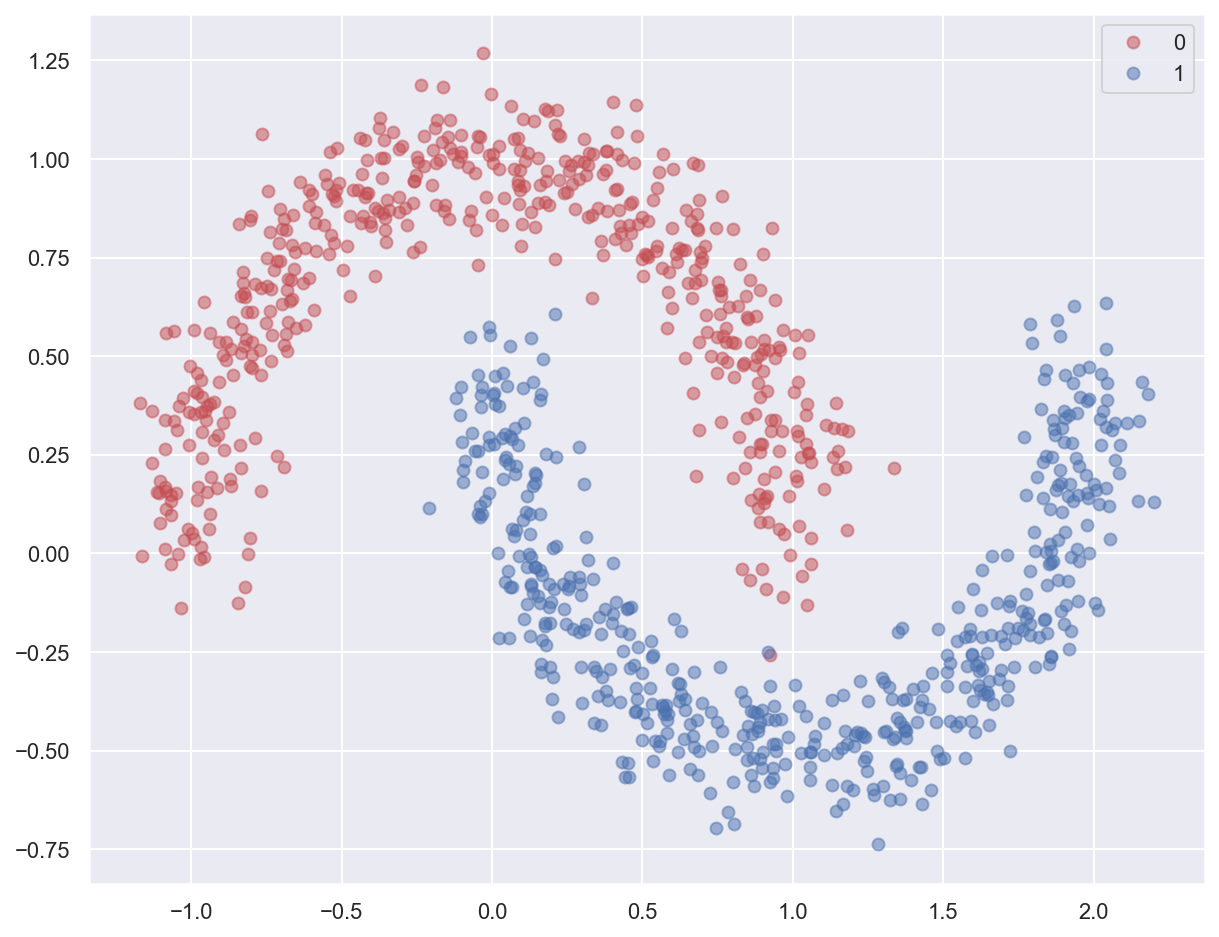

In [29]:
# Generate moon-shaped, non-linearly separable data
x, y = make_moons(n_samples=1000, noise=0.10, random_state=0)

print(f'x: {x.shape}. y: {y.shape}')
mlkatas.plot_planar_data(x, y)

In [61]:
# Create PyTorch tensors from Numpy data, with appropriate types
x_train = torch.from_numpy(x).float()
y_train = torch.from_numpy(y).long()

In [65]:
# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. Each Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
model = nn.Sequential(
    nn.Linear(2, 3),
    nn.Tanh(),
    nn.Linear(3, 2)
)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Cross Entropy as our loss function.
loss_fn = nn.CrossEntropyLoss()

# Writer will output to ./runs/ directory by default
writer = SummaryWriter()

learning_rate = 1.0
for t in range(2000):
    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(x_train)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y_train)
    if t % 100 == 99:
        print(f'Epoch: {t}. Loss: {loss.item()}')
        # Write epoch loss to TensorBoard
        writer.add_scalar('Loss/train', loss.item(), t)

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

Epoch: 99. Loss: 0.2570095360279083
Epoch: 199. Loss: 0.21523356437683105
Epoch: 299. Loss: 0.06987755000591278
Epoch: 399. Loss: 0.026537660509347916
Epoch: 499. Loss: 0.015993474051356316
Epoch: 599. Loss: 0.011723280884325504
Epoch: 699. Loss: 0.00946120172739029
Epoch: 799. Loss: 0.008061292581260204
Epoch: 899. Loss: 0.007105412892997265
Epoch: 999. Loss: 0.0064079370349645615
Epoch: 1099. Loss: 0.00587448850274086
Epoch: 1199. Loss: 0.0054520294070243835
Epoch: 1299. Loss: 0.005108395125716925
Epoch: 1399. Loss: 0.004822921007871628
Epoch: 1499. Loss: 0.004581669811159372
Epoch: 1599. Loss: 0.004374888259917498
Epoch: 1699. Loss: 0.004195535089820623
Epoch: 1799. Loss: 0.0040383897721767426
Epoch: 1899. Loss: 0.0038994746282696724
Epoch: 1999. Loss: 0.003775747725740075


## Using TensorBoard with PyTorch

In [68]:
%tensorboard --logdir=runs

More info on PyTorch/TensorBoard integration here: <https://pytorch.org/tutorials/intermediate/tensorboard_tutorial.html>